In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
review=pd.read_csv('AmazonReview.csv')
review.head()

,Review,Rating
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [3]:
review.shape

(25000, 2)

In [4]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  24999 non-null  object
 1   Rating  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
review.describe(include='all')

,Review,Rating
count,24999,25000.000000
unique,24744,NaN
top,Good,NaN
freq,21,NaN
mean,NaN,3.000000
std,NaN,1.414242
min,NaN,1.000000
25%,NaN,2.000000
50%,NaN,3.000000
75%,NaN,4.000000


In [6]:
review.isna().sum()

Review    1
Rating    0
dtype: int64

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayasa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ayasa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
review.columns

Index(['Review', 'Rating'], dtype='object')

In [9]:
review['Rating'].value_counts()

Rating
1    5000
2    5000
3    5000
4    5000
5    5000
Name: count, dtype: int64

In [10]:
review.loc[review['Rating']<=3,'Rating']=0
review.loc[review['Rating']>3,'Rating']=1

In [11]:
review['Rating'].value_counts()

Rating
0    15000
1    10000
Name: count, dtype: int64

In [12]:
data=review

In [13]:
data.dropna(inplace=True)

In [14]:
data.head()

,Review,Rating
0,Fast shipping but this product is very cheaply...,0
1,This case takes so long to ship and it's not e...,0
2,Good for not droids. Not good for iPhones. You...,0
3,The cable was not compatible between my macboo...,0
4,The case is nice but did not have a glow light...,0


In [15]:
data['Review']=data['Review'].astype('str')

In [16]:
stop_words=stopwords.words('english')
def clean_review(review):
    cleanreview=" ".join(word for word in review.
                         split() if word not in stop_words)
    return cleanreview

data['Review']=data['Review'].apply(clean_review)

In [17]:
data.tail(20)

,Review,Rating
24980,"Great cable, complaints far. Charges ipod ipho...",1
24981,I copied review blue case since I bought blue ...,1
24982,"Finally reasonably priced , longer charging ca...",1
24983,"This product impressive. Thanks reviews, I abl...",1
24984,I use device transmit DirecTV satellite receiv...,1
24985,Amazing Device!,1
24986,My stock radio took dump 6 disk cd player stop...,1
24987,"problem card size, squeeze sideways.<br />othe...",1
24988,This device + Shure E535 earbuds + FLAC files ...,1
24989,I love case. I larger version 15 inch laptop. ...,1


In [18]:
review.tail(20)

,Review,Rating
24980,"Great cable, complaints far. Charges ipod ipho...",1
24981,I copied review blue case since I bought blue ...,1
24982,"Finally reasonably priced , longer charging ca...",1
24983,"This product impressive. Thanks reviews, I abl...",1
24984,I use device transmit DirecTV satellite receiv...,1
24985,Amazing Device!,1
24986,My stock radio took dump 6 disk cd player stop...,1
24987,"problem card size, squeeze sideways.<br />othe...",1
24988,This device + Shure E535 earbuds + FLAC files ...,1
24989,I love case. I larger version 15 inch laptop. ...,1


In [19]:
test=data.head(25)

In [20]:
test.to_csv("test.csv")

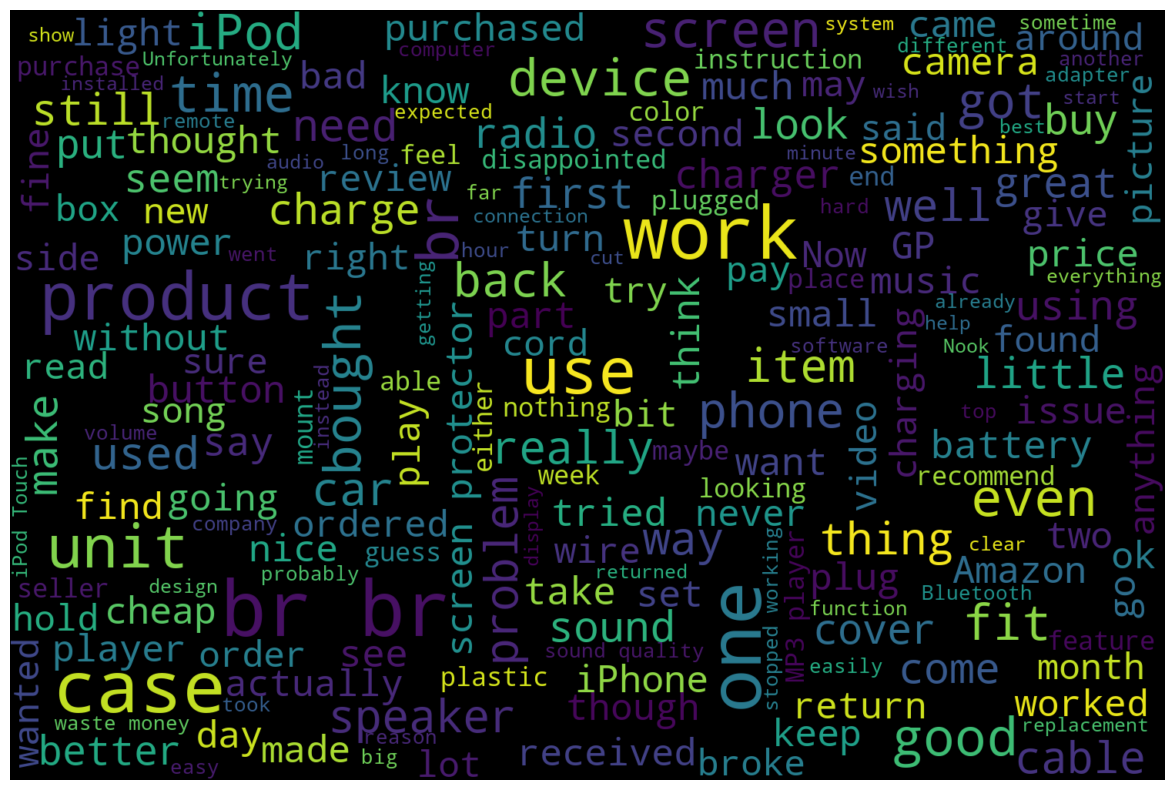

In [21]:
consolidate=" ".join(word for word in data['Review'][data['Rating']==0].astype(str))
wordcloud=WordCloud(width=1500,height=1000,random_state=0,max_font_size=100)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud.generate(consolidate),interpolation='bilinear')
plt.axis('off')
plt.show()

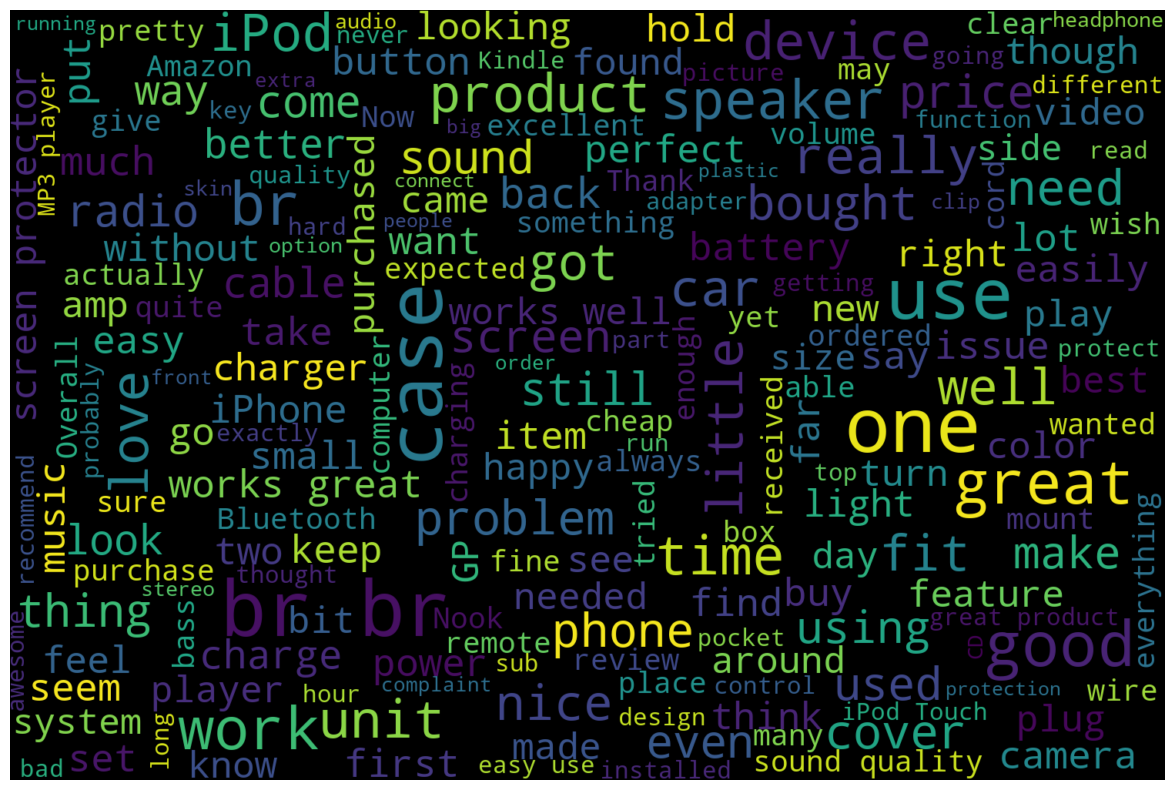

In [22]:
consolidate=" ".join(word for word in data['Review'][data['Rating']==1].astype(str))
wordcloud=WordCloud(width=1500,height=1000,random_state=0,max_font_size=100)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud.generate(consolidate),interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
#TF-IDF(converting text into vectors)
cv=TfidfVectorizer(max_features=2500)
x=cv.fit_transform(data['Review']).toarray()

In [25]:
data.columns

Index(['Review', 'Rating'], dtype='object')

In [26]:
#model training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,data['Rating'],test_size=0.25, random_state=0)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

model=LogisticRegression()
#fit the model
model.fit(x_train,y_train)
#testing the model
y_pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,y_pred))

0.81456


In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[3328,  440],
       [ 719, 1763]], dtype=int64)

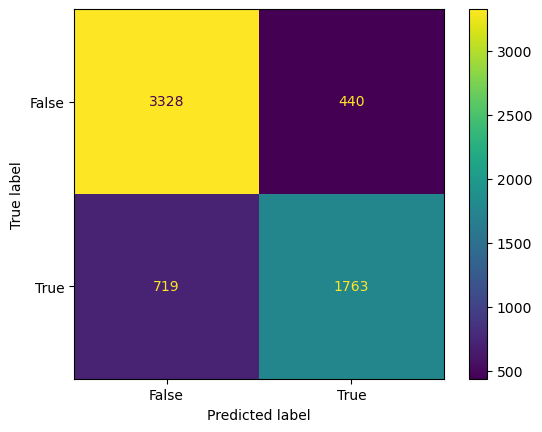

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
plt.show()